# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

##### 1.0 Importando as bibliotecas necessárias:

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


##### 1.1 Carregando a base de dados:


In [20]:
# Carregue a base de dados
df = pd.read_csv('demo01_transformado.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


##### 1.2 Verificando se há pendências:

In [21]:
# Verifica se há valores ausentes
if df.isnull().sum().sum() > 0:
    print("Há valores ausentes na base de dados.")


In [23]:
# Verificando se há variáveis em formato string
if df.select_dtypes(include=['object']).shape[1] > 0:
    print("Há variáveis em formato string na base de dados.")

Há variáveis em formato string na base de dados.


###### 1.2.1 Convertendo as varáveis em formato string para dummie

In [24]:
for col in df.select_dtypes(include=['object']).columns:
    # Cria variáveis dummy para a coluna
    dummies = pd.get_dummies(df[col], prefix=col)
    # Adiciona as variáveis dummy à base de dados
    df = pd.concat([df, dummies], axis=1)
    # Remove a coluna original
    df = df.drop(col, axis=1)
print("As variáveis em formato string foram convertidas com sucesso!")

As variáveis em formato string foram convertidas com sucesso!


In [25]:
# Verificando novamente se há variáveis em formato string
if df.select_dtypes(include=['object']).shape[1] > 0:
    print("Há variáveis em formato string na base de dados.")


##### 1.3 Separando 70% da base para treinamento e 30% para validação

In [26]:
# Separando a variável mau das variáveis explicativas
y = df['mau']
X = df.drop('mau', axis=1)

In [27]:
# Dividindo a base de dados em treinamento (70%) e validação (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print("A base de dados foi carregada e preparada com sucesso!")

A base de dados foi carregada e preparada com sucesso!


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

##### 2.1 Definindo um objeto com a função da árvore de decisão:

In [28]:
# Definindo o objeto da árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

##### 2.2 Treinando o modelo com os dados separados para treinamento:

In [29]:
# Treinando o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### 2.3 Visualizando a árvore:

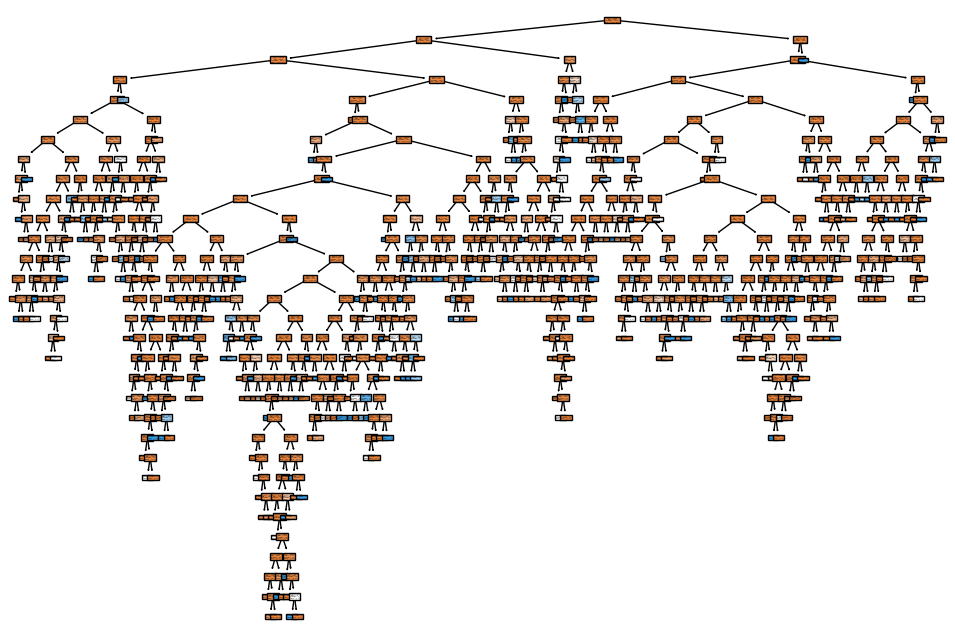

In [30]:
# Visualizando a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

##### 2.4 Produzindo uma visualização da matriz de classificação (ou matriz de confusão)

In [34]:
# Fazendo previsões na base de treinamento
y_train_pred = clf.predict(X_train)

# Criando a matriz de confusão
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm, index=['aprovados', 'reprovados'], columns=['aprovados', 'reprovados'])
cm_df

,aprovados,reprovados
aprovados,11357,16
reprovados,86,196


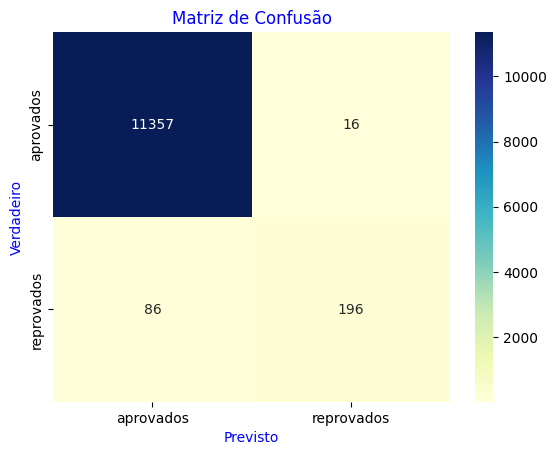

In [48]:
# Visualizando a matriz de confusão
sns.heatmap(cm_df, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Matriz de Confusão', color='blue')
plt.ylabel('Verdadeiro', color='blue')
plt.xlabel('Previsto', color='blue')
plt.show()

##### 2.5 Calculando a acurácia na base de treinamento

In [67]:
# Calculando a acurácia na base de treinamento
accuracy = accuracy_score(y_train, y_train_pred)

print(f'A acurácia na base de treinamento é {accuracy:.4f} ou {accuracy*100:.2f}%')

A acurácia na base de treinamento é 0.9912 ou 99.12%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

##### 3.1 Classificando a base de teste de acordo com a árvore treinada no item 2:

In [49]:
# Fazendo previsões na base de teste
y_val_pred = clf.predict(X_val)

##### 3.2 Produzindo a visualização da matriz de confusão para a base de teste:

In [57]:
# Criando a matriz de confusão para a base de teste
cm_val = confusion_matrix(y_val, y_val_pred)
cm_val_df = pd.DataFrame(cm_val, index=['aprovados', 'reprovados'], columns=['aprovados', 'reprovados'])


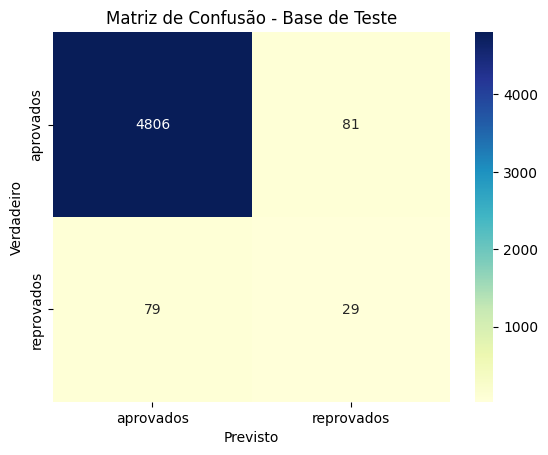

In [58]:
# Visualizando a matriz de confusão para a base de teste
sns.heatmap(cm_val_df, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Matriz de Confusão - Base de Teste')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

##### 3.3 Calculando a acurácia da base de teste e comparando com a acurácia da base de treinamento:

In [66]:
# Calculando a acurácia na base de teste
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'A acurácia na base de treinamento é {accuracy_val:.4f} ou {accuracy_val*100:.2f}%')

A acurácia na base de treinamento é 0.9680 ou 96.80%


In [61]:
# Calculando a acurácia na base de teste
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'A acurácia na base de teste é {accuracy_val:.4f}')

# Comparando com a acurácia da base de treinamento
print(f'A acurácia na base de treinamento é {accuracy:.4f}')

A acurácia na base de teste é 0.9680
A acurácia na base de treinamento é 0.9912



A diferença entre a acurácia da base de treinamento e a acurácia da base de teste pode ser um indicativo de overfitting. Overfitting ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados, como os da base de teste. Nesse caso, o modelo pode estar capturando ruídos ou variações aleatórias nos dados de treinamento, em vez das relações subjacentes entre as variáveis.


> No entanto, uma diferença pequena entre a acurácia da base de treinamento e a acurácia da base de teste, como nesse caso, é normal e pode indicar que o modelo está generalizando bem para novos dados.



##### 3.4 Treinando uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.

In [64]:
# Treinando uma nova árvore com parâmetros diferentes
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf2.fit(X_train, y_train)

# Fazendo previsões com a nova árvore e calculando a acurácia
y_val_pred2 = clf2.predict(X_val)
accuracy_val2 = accuracy_score(y_val, y_val_pred2)
print(f'A acurácia na base de teste com a nova árvore é {accuracy_val2 * 100:.2f}% ou {accuracy_val2:.4f}')

# Calculando a proporção de proponentes classificados como 'maus'
prop_maus = sum(y_val_pred2) / len(y_val_pred2)
print(f'A proporção de proponentes classificados como "maus" é {prop_maus * 100:.2f}% ou {prop_maus:.4f}')


A acurácia na base de teste com a nova árvore é 97.52% ou 0.9752
A proporção de proponentes classificados como "maus" é 0.64% ou 0.0064


##### 3.5 Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [69]:
# Calculando a acurácia se todos os contratos fossem classificados como 'bons'
accuracy_all_good = accuracy_score(y_val, [0]*len(y_val))
print(f'A acurácia se todos os contratos fossem classificados como "bons" é {accuracy_all_good * 100:.2f}% ou {accuracy_all_good:.4f} ')


A acurácia se todos os contratos fossem classificados como "bons" é 97.84% ou 0.9784 
